# Convolution Neural Networks
In this tutorial we will implement a simple Convolutional Neural Network in TensorFlow with two convolutional layers, followed by two fully-connected layers at the end. The network structure is shown in the following figure and has classification accuracy of above 99% on MNIST data.


*Fig1. CNN structure used for digit recognition*


## 0. imports
First, we have to import the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

  # MNIST images are 28x28
img_h = 28
img_w = 28
img_size_flat = img_h * img_w  # 28x28=784, the total number of pixels
n_classes = 10  # Number of classes, one class per digit
n_channels = 1

### 1.2. Helper functions to load the MNIST data

In [3]:
def load_data(mode='train'):
    """
    Function to (download and) load the MNIST data
    :param mode: train or test
    :return: images and the corresponding labels
    """
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    if mode == 'train':
        x_train, y_train, x_valid, y_valid = mnist.train.images, mnist.train.labels, \
                                             mnist.validation.images, mnist.validation.labels
        x_train, _ = reformat(x_train, y_train)
        x_valid, _ = reformat(x_valid, y_valid)
        return x_train, y_train, x_valid, y_valid
    elif mode == 'test':
        x_test, y_test = mnist.test.images, mnist.test.labels
        x_test, _ = reformat(x_test, y_test)
    return x_test, y_test


def reformat(x, y):
    """
    Reformats the data to the format acceptable for convolutional layers
    :param x: input array
    :param y: corresponding labels
    :return: reshaped input and labels
    """
    img_size, num_ch, num_class = int(np.sqrt(x.shape[-1])), 1, len(np.unique(np.argmax(y, 1)))
    dataset = x.reshape((-1, img_size, img_size, num_ch)).astype(np.float32)
    labels = (np.arange(num_class) == y[:, None]).astype(np.float32)
    return dataset, labels

def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :, :, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

### 1.3. Load the data and display the sizes
Now we can use the defined helper function in "train" mode which loads the train and validation images and their corresponding labels. We'll also display their sizes:

In [4]:
x_train, y_train, x_valid, y_valid = load_data(mode='train')
print("Size of:")
print("- Training-set:\t\t{}".format(len(y_train)))
print("- Validation-set:\t{}".format(len(y_valid)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Size of:
- Training-set:		55000
- Validation-set:	5000


## 2. Hyperparameters

In [5]:
logs_path = "./logs"  # path to the folder that we want to save the logs for Tensorboard
lr = 0.001  # The optimization initial learning rate
epochs = 10  # Total number of training epochs
batch_size = 100  # Training batch size
display_freq = 100  # Frequency of displaying the training results

## 3. Network configuration

In [6]:
# 1st Convolutional Layer
filter_size1 = 5  # Convolution filters are 5 x 5 pixels.
num_filters1 = 16  # There are 16 of these filters.
stride1 = 1  # The stride of the sliding window

# 2nd Convolutional Layer
filter_size2 = 5  # Convolution filters are 5 x 5 pixels.
num_filters2 = 32  # There are 32 of these filters.
stride2 = 1  # The stride of the sliding window

# Fully-connected layer.
h1 = 128  # Number of neurons in fully-connected layer.

## 4. Create network helper functions 
### 4.1. Helper functions for creating new variables

In [7]:
# weight and bais wrappers
def weight_filter(shape):
    """
    Create a weight filter with appropriate initialization
    :param name: weight name
    :param shape: weight shape
    :return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W',
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)


def bias_variable(shape):
    """
    Create a bias variable with appropriate initialization
    :param name: bias variable name
    :param shape: bias variable shape
    :return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b',
                           dtype=tf.float32,
                           initializer=initial)

### 4.2. Helper-function for creating a new Convolutional Layer


 You must complete the following function.
To do this you must use the function tf.nn.conv2d

In [8]:
def conv_layer(x, filter_size, num_filters, stride, name):
    """
    Create a 2D convolution layer
    :param x: input from previous layer
    :param filter_size: size of each filter
    :param num_filters: number of filters (or output feature maps)
    :param stride: filter stride
    :param name: layer name
    :return: The output array
    """
    with tf.variable_scope(name):
        #TODO
        
        num_in_channel = x.get_shape().as_list()[-1]
        
        
        # compute W and b with the correct shape
        
        #W is a tensor of shape filter_size * filter_size * num_in_channel * num_filters 
        W = weight_filter(shape=(filter_size * filter_size * num_in_channel * num_filters))
        
        # B is vector. We have one bias for each filter
        b = bias_variable(shape=[filter_size]) # => num_filters
        
        #create a conv2d with x and W with tf.nn.conv2d function
        layer = tf.nn.conv2d(x, W, 1, "SAME") # => [1, stride, stride, 1]
        
        #add bias
        layer += b
        
        #add relu function from tf.nn.relu 
        output = tf.nn.relu(layer)
        return output

### 4.3. Helper-function for creating a new Max-pooling Layer


In [9]:
def max_pool(x, ksize, stride, name):
    """
    Create a max pooling layer
    :param x: input to max-pooling layer
    :param ksize: size of the max-pooling filter
    :param stride: stride of the max-pooling filter
    :param name: layer name
    :return: The output array
    """
    return tf.nn.max_pool(x,
                          ksize=[1, ksize, ksize, 1],
                          strides=[1, stride, stride, 1],
                          padding="SAME",
                          name=name)

### 4.4. Helper-function for flattening a layer


In [10]:
def flatten_layer(layer):
    """
    Flattens the output of the convolutional layer to be fed into fully-connected layer
    :param layer: input array
    :return: flattened array
    """
    with tf.variable_scope('Flatten_layer'):
        layer_shape = layer.get_shape()
        num_features = layer_shape[1:4].num_elements()
        layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat

### 4.5. Helper-function for creating a new fully-connected Layer


In [11]:
def fc_layer(x, num_units, name, use_relu=True):
    """
    Create a fully-connected layer
    :param x: input from previous layer
    :param num_units: number of hidden units in the fully-connected layer
    :param name: layer name
    :param use_relu: boolean to add ReLU non-linearity (or not)
    :return: The output array
    """
    with tf.variable_scope(name):
        in_dim = x.get_shape()[1]
        W = weight_variable(shape=[in_dim, num_units])
        b = bias_variable(shape=[num_units])
        layer = tf.matmul(x, W)
        layer += b
        if use_relu:
            layer = tf.nn.relu(layer)
        return layer

## 5. Network graph

### 5.1. Placeholders for the inputs (x) and corresponding labels (y)


In [12]:
with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32, shape=[None, img_h, img_w, n_channels], name='X')
    y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')

### 5.2. Create the network layers

In [13]:
conv1 = conv_layer(x, filter_size1, num_filters1, stride1, name='conv1')
pool1 = max_pool(conv1, ksize=2, stride=2, name='pool1')
conv2 = conv_layer(pool1, filter_size2, num_filters2, stride2, name='conv2')
pool2 = max_pool(conv2, ksize=2, stride=2, name='pool2') # = vecteur

#TODO add flatten layer
layer_flat = flatten_layer([conv1,pool1,conv2, pool2]) # => pool2
# ADD feed forward
fc1 = fc_layer(x, h1, 'FC1', use_relu=True)
output_logits = fc_layer(fc1, n_classes, 'OUT', use_relu=False)

ValueError: Shape must be rank 4 but is rank 1 for 'conv1/Conv2D' (op: 'Conv2D') with input shapes: [?,28,28,1], [400].

### 5.3. Define the loss function, optimizer, accuracy, and predicted class


In [14]:
with tf.variable_scope('Train'):
    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
    tf.summary.scalar('loss', loss)
    
    with tf.variable_scope('Optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate=lr, name='Adam-op').minimize(loss)
        
    with tf.variable_scope('Accuracy'):
        correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
    tf.summary.scalar('accuracy', accuracy)
    
    with tf.variable_scope('Prediction'):
        cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 5.4. Initialize all variables and merge the summaries

In [15]:
# Initialize the variables
init = tf.global_variables_initializer()
# Merge all summaries
merged = tf.summary.merge_all()

## 6. Train

In [16]:
sess = tf.InteractiveSession()
sess.run(init)
global_step = 0
#used for tensorboard
summary_writer = tf.summary.FileWriter(logs_path, sess.graph)
# Number of training iterations in each epoch
num_tr_iter = int(len(y_train) / batch_size)
for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch + 1))
    x_train, y_train = randomize(x_train, y_train)
    for iteration in range(num_tr_iter):
        global_step += 1
        start = iteration * batch_size
        end = (iteration + 1) * batch_size
        x_batch, y_batch = get_next_batch(x_train, y_train, start, end)

        # Run optimization op (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % display_freq == 0:
            # Calculate and display the batch loss and accuracy
            loss_batch, acc_batch, summary_tr = ????
            
            # TODO write summary => summary_writer.add_summary(summary_tr, global_step)
            ???

            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # Run validation after every epoch
    feed_dict_valid = {x: x_valid, y: y_valid}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')

Training epoch: 1
iter   0:	 Loss=2.30,	Training Accuracy=13.0%
iter 100:	 Loss=0.53,	Training Accuracy=82.0%
iter 200:	 Loss=0.14,	Training Accuracy=95.0%
iter 300:	 Loss=0.16,	Training Accuracy=93.0%
iter 400:	 Loss=0.22,	Training Accuracy=90.0%
iter 500:	 Loss=0.10,	Training Accuracy=98.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.12, validation accuracy: 96.5%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.12,	Training Accuracy=98.0%
iter 100:	 Loss=0.11,	Training Accuracy=96.0%
iter 200:	 Loss=0.07,	Training Accuracy=97.0%
iter 300:	 Loss=0.17,	Training Accuracy=95.0%
iter 400:	 Loss=0.06,	Training Accuracy=96.0%
iter 500:	 Loss=0.07,	Training Accuracy=97.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.07, validation accuracy: 97.7%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.05,	Training Accuracy=99

## 7. Test

In [17]:
def plot_images(images, cls_true, cls_pred=None, title=None):
    """
    Create figure with 3x3 sub-plots.
    :param images: array of images to be plotted, (9, img_h*img_w)
    :param cls_true: corresponding true labels (9,)
    :param cls_pred: corresponding true labels (9,)
    """
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(np.squeeze(images[i]), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=20)
    plt.show(block=False)
    
def plot_example_errors(images, cls_true, cls_pred, title=None):
    """
    Function for plotting examples of images that have been mis-classified
    :param images: array of all images, (#imgs, img_h*img_w)
    :param cls_true: corresponding true labels, (#imgs,)
    :param cls_pred: corresponding predicted labels, (#imgs,)
    """
    # Negate the boolean array.
    incorrect = np.logical_not(np.equal(cls_pred, cls_true))

    # Get the images from the test-set that have been
    # incorrectly classified.
    incorrect_images = images[incorrect]

    # Get the true and predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    cls_true = cls_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=incorrect_images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9],
                title=title)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
---------------------------------------------------------
Test loss: 0.04, test accuracy: 98.9%
---------------------------------------------------------


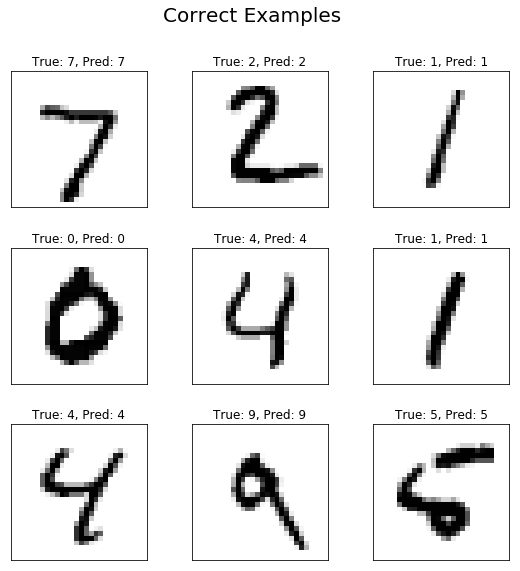

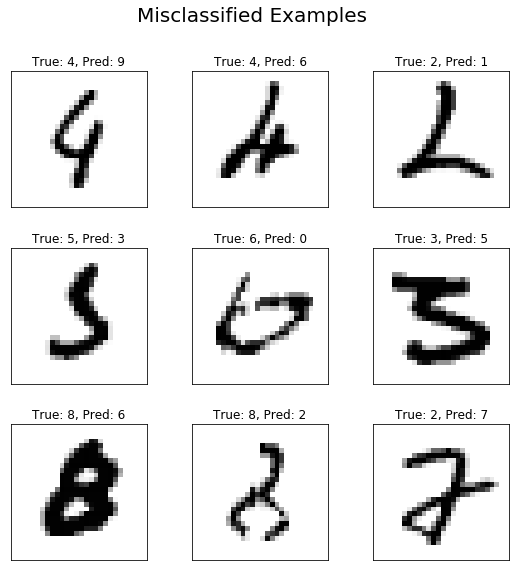

In [18]:
# Test the network when training is done
x_test, y_test = load_data(mode='test')
feed_dict_test = {x: x_test, y: y_test}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

# Plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test, axis=1)
plot_images(x_test, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(x_test, cls_true, cls_pred, title='Misclassified Examples')
plt.show()

After we are finished the testing, we will close the session to free the memory.

In [19]:
# close the session after you are done with testing
sess.close()

At this step our coding is done. We can inspect more in our network using the __Tensorboard__ open your terminal and type:
```bash
tensorboard --logdir=logs --host localhost
```
__NOTE:__ Don't forget to activate your environment !!!

Open the generated link in your browser.

Thanks for reading! If you have any question or doubt, feel free to leave a comment in our [website](http://easy-tensorflow.com/).